In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [5]:
L = 10.0         # length of the domain (m)
nx = 101         # number of spatial grid points
dx = L / (nx-1)  # spatial step size (m)
x = np.linspace(0, L, nx)  # spatial grid

In [11]:
h0 = np.exp(-10 * (x-2)**2)  # initial depth of water (m)
u0 = 0.0  # initial velocity of water (m/s)
g = 9.81  # acceleration due to gravity (m/s^2)

# initial condition vector
y0 = np.zeros(2*nx)
y0[:nx] = h0
y0[nx:] = u0

In [12]:
y0

array([4.24835426e-018, 2.09879105e-016, 8.48904403e-015, 2.81118530e-013,
       7.62186519e-012, 1.69189792e-010, 3.07487988e-009, 4.57533877e-008,
       5.57390369e-007, 5.55951324e-006, 4.53999298e-005, 3.03539138e-004,
       1.66155727e-003, 7.44658307e-003, 2.73237224e-002, 8.20849986e-002,
       2.01896518e-001, 4.06569660e-001, 6.70320046e-001, 9.04837418e-001,
       1.00000000e+000, 9.04837418e-001, 6.70320046e-001, 4.06569660e-001,
       2.01896518e-001, 8.20849986e-002, 2.73237224e-002, 7.44658307e-003,
       1.66155727e-003, 3.03539138e-004, 4.53999298e-005, 5.55951324e-006,
       5.57390369e-007, 4.57533877e-008, 3.07487988e-009, 1.69189792e-010,
       7.62186519e-012, 2.81118530e-013, 8.48904403e-015, 2.09879105e-016,
       4.24835426e-018, 7.04065961e-020, 9.55316054e-022, 1.06126027e-023,
       9.65245626e-026, 7.18778174e-028, 4.38220836e-030, 2.18742046e-032,
       8.93948745e-035, 2.99112162e-037, 8.19401262e-040, 1.83780864e-042,
       3.37477679e-045, 5

In [13]:
def rhs(y, t):
    h = y[:nx]
    u = y[nx:]

    # create right-hand side of ODE system
    dydt = np.zeros_like(y)

    # derivative of h
    dydt[:nx] = -u * (np.roll(h, -1) - np.roll(h, 1)) / (2 * dx)

    # derivative of u
    dydt[nx:] = -g * (np.roll(h, -1) - np.roll(h, 1)) / (2 * dx) - u * (
        np.roll(u, -1) - np.roll(u, 1)
    ) / (2 * dx)

    return dydt

In [14]:
T = 1.0   # end time (s)
dt = 0.01  # time step size (s)
t = np.arange(0, T, dt)  # time grid

# solve ODE system
y = odeint(rhs, y0, t)

# extract h and u from solution
h = y[:, :nx]
u = y[:, nx:]

/home/owais/anaconda3/envs/machine_learning/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

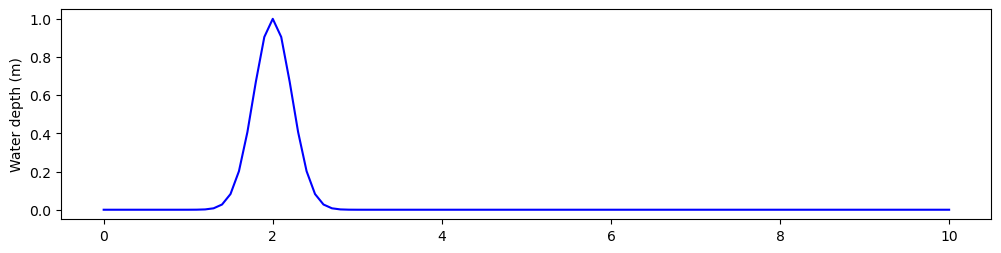

In [15]:
for i in range(0, len(t), 10):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(x, h[i], "b")
    plt.ylabel("Water depth (m)")
    plt.ylim(h0 - 0.1, h0 + 0.1)
    plt.title(f"t = {t[i]:.2f} s")

    plt.subplot(2, 1, 2)
    plt.plot(x, u[i], "r")
    plt.xlabel("x (m)")
    plt.ylabel("Velocity (m/s)")
    plt.ylim(u0 - 0.1, u0 + 0.1)

    plt.tight_layout()
    plt.show()